https://algorithmicthoughts.wordpress.com/2013/07/26/machine-learning-mini-batch-k-means/

In [51]:
from __future__ import division


In [52]:

def get_closest(x, centers):
    distances = []
    
    #get the distance from the point(x) to every centroid
    #and get the index of centroid that yields 
    #the minimum distance 
    
    for mu in centers:
        distances.append(np.linalg.norm(x-mu))
    index = np.argmin(distances)
    
    return index, min(distances)
    

In [83]:
'''
This function returns the value of the k-means objective function

Input:
X- data points to be clustered
k- number of clusters
C- Information about which cluster each data-point corresponds to
centers- list of k centroids 

Output:
sum_distance - value obtained by evaluating the k means objective function

'''

def k_means_objective(X, k, C, centers):
    
    sum_distance = 0
    for j in range(k):
        for x in X[C==j]:
            sum_distance += (np.linalg.norm(x-centers[j]))**2
                
    return sum_distance

In [53]:
def mykmeans_plus_plus(p, k, max_iter):
    centers = []
    centers_list = []
    distortion = []
    centers.append(random.sample(p,1))
    
    for r in range(k-1):
        x = random.random()
        num_dx = (get_closest(p[0],centers)[1])**2
        den_dx = 0
        for x_i in p:
            den_dx += (get_closest(x_i,centers)[1])**2
        index = 0
        while num_dx/den_dx < x:
            
            index += 1
            num_dx += (get_closest(p[index],centers)[1])**2

        centers.append(p[index])
    
    centers_list.append(centers)
    for t in range(max_iter):    
        C=[0]*len(p)
        
        
        #assign clusters
        for i in range(len(p)): 
            index = get_closest(p[i], centers)[0]
            C[i] = index
        
        C = np.array(C)
        
        distortion.append(k_means_objective(p, k, C, centers))
        
        centers = [p[C==j].mean(axis = 0) for j in range(k)]
        centers_list.append(centers)
        
        C = np.array(C)
        
    return C, centers, distortion, centers_list  

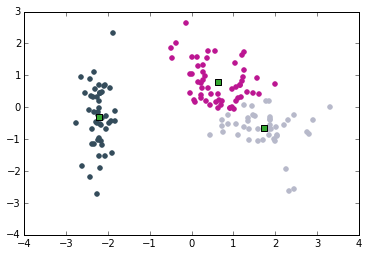

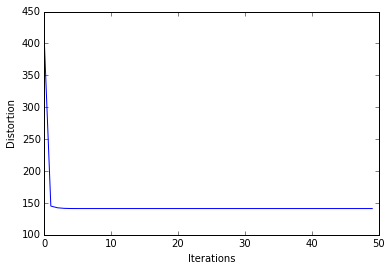

In [84]:
k1 = 3
C2, centers2, distortion, centers_list2 = mykmeans_plus_plus(X_scaled, k1,50)
centers2_pca = pca.transform(centers2) 

   
centers_list2 = np.array(centers_list2)
plot_kmeans(C2, centers2_pca, X_pca, k)
    
plt.figure()
index1= [i for i in range(50)]
plt.plot(index1, distortion)
plt.xlabel('Iterations')
plt.ylabel('Distortion')


In [94]:
def mini_batch(X, k, b, max_iter):
    v = [0]*k
    centers = random.sample(X, 3)
    distortion = []
  
    for i in range(max_iter):
        M = random.sample(X,b)
        C=[0]*len(M)
        for i,x in enumerate(M): 
            index = get_closest(x, centers)[0]
            C[i] = index
      
        
        for i, x in enumerate(M):
            index = C[i]
            v[index]+=1
            n = 1/v[index]
    
            centers[index] = (1- n)*centers[index] + n*x
        
        D=[0]*len(X)
        for i in range(len(X)): 
            index = get_closest(X[i], centers)[0]
            D[i] = index
        
        D = np.array(D)
        
        distortion.append(k_means_objective(X, k, D, centers))

            
    return centers, distortion

In [95]:
def plot_kmeans(C,centers,X_pca,k):
    
    #choose random colour for the centroids
    marker_c = [random.random() for y in range(3)]

    for i in range(k):
        
            #plot data-points corresponding to a specific cluster
            #with a random colour and plot the centroid of that 
            #cluster
            
            x = X_pca[C==i]
            colour = [random.random() for c in range(3)]
            plt.scatter(x[:,0],x[:,1], color=colour)
            plt.scatter(centers[i][0], centers[i][1], marker='s', c = marker_c, s = 40)
           

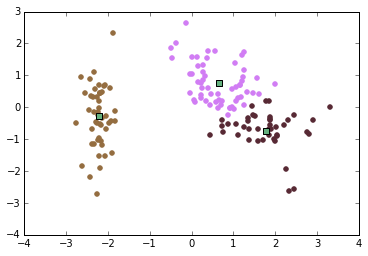

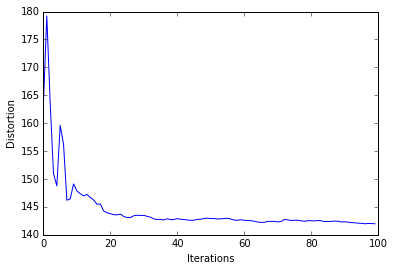

In [97]:
%matplotlib inline
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.decomposition import PCA
from sklearn import preprocessing

np.random.seed(12222015)

iris = load_iris() 
X = iris.data
Y = iris.target

X_scaled = preprocessing.scale(X)

k = 3 

centers, distortion = mini_batch(X_scaled, k, 5, 100)

C=[0]*len(X_scaled)
for i in range(len(X_scaled)):
    index = get_closest(X_scaled[i], centers)[0]
    C[i] = index

    
C = np.array(C)
        
#use PCA to reduce the dimenions to 2(for plotting)
pca = PCA(n_components=2)
pca.fit(X_scaled)

centers_pca = pca.transform(centers) 
X_pca = pca.transform(X_scaled) 

plot_kmeans(C, centers_pca, X_pca, k)

plt.figure()
index1= [i for i in range(100)]
plt.plot(index1, distortion)
plt.xlabel('Iterations')
plt.ylabel('Distortion')
